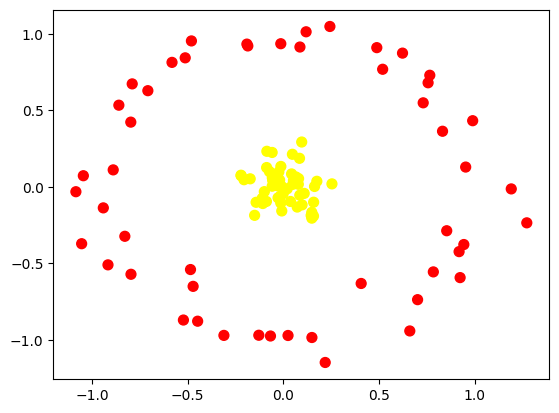

In [1]:
# data generation
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
from sklearn.svm import SVC

X, y = make_circles(100, factor=.1, noise=.1)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
3360/3360 ━━━━━━━━━━━━━━━━━━━━ 2s 552us/step


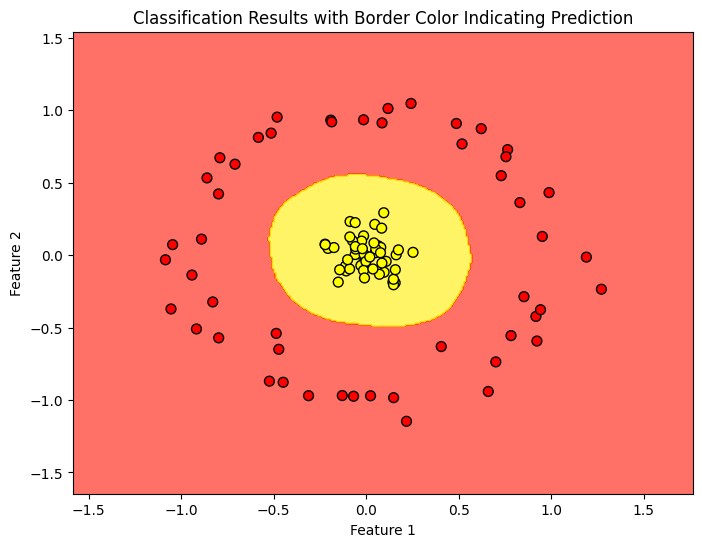

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l2

# 创建和训练一个分类神经网络模型 / Create and train a classification neural network model
model = Sequential()
model.add(Dense(64, input_dim=2, activation='relu', kernel_regularizer=l2(0.001)))  # 输入为2维 / Input has 2 dimensions
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dense(1, activation='sigmoid'))  # 输出层，分类任务输出0或1 / Output layer for binary classification (0 or 1)

# 编译模型 / Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 训练模型 / Train the model
model.fit(X, y, epochs=100, batch_size=32, verbose=0)  # 设置 verbose=0 以减少训练时的输出 / Set verbose=0 to reduce output during training

# 使用模型对测试集进行预测 / Predict on the test set
y_pred = (model.predict(X) > 0.5).astype(int)  # 将连续值转换为0或1 / Convert continuous output to 0 or 1

# 绘制分类结果，使用边框颜色标记预测结果 / Plot classification result with border color indicating predicted results
def plot_classification(X, y_true, y_pred):
    plt.figure(figsize=(8, 6))
    
    # 决策边界的网格 / Generate grid for decision boundary
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    
    # 使用模型预测网格中的每个点 / Predict each grid point using the model
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = (Z > 0.5).astype(int)
    Z = Z.reshape(xx.shape)

    # 绘制决策边界 / Plot decision boundary
    plt.contourf(xx, yy, Z, alpha=0.6, cmap='autumn')

    # 绘制真实类别的散点图 / Plot true class scatter plot
    plt.scatter(X[:, 0], X[:, 1], c=y_true, s=50, edgecolor='k', cmap='autumn')

    plt.title('Classification Results with Border Color Indicating Prediction')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# 调用函数绘制分类结果 / Call the function to plot classification results
plot_classification(X, y, y_pred)

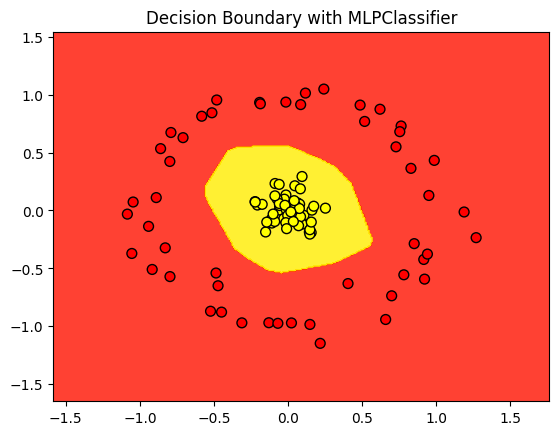

In [3]:
import numpy as np
from sklearn.neural_network import MLPClassifier

# MLPClassifier神经网络模型 / Neural network model of MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000, random_state=42)
mlp.fit(X, y)

# 绘制决策边界 / Function to plot decision boundary
def plot_decision_boundary(model, X, y):
    # 创建网格以进行绘图 / Create a mesh grid for plotting
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    
    # 使用分类器预测网格中的每个点 / Use classifier to predict each grid point
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # 绘制决策边界 / Plot decision boundary
    plt.contourf(xx, yy, Z, alpha=0.8, cmap='autumn')

    # 绘制数据点 / Plot data points
    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolor='k', cmap='autumn')
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("Decision Boundary with MLPClassifier")
    plt.show()

# 调用函数绘制决策边界 / Call the function to plot decision boundary
plot_decision_boundary(mlp, X, y)